# Visualize Graph Interactably

In [8]:
drugs_edgelist_path = "outputs/drugs_html_edgelist.csv"

In [ ]:
# # Colab-only
# # NetworkX 3 is bugged
# # https://stackoverflow.com/questions/71363860/plot-networkx-graph-with-numpy-array-error
# !pip install --force-reinstall -v "networkx==2.6.3"

In [4]:
import pandas as pd
import networkx as nx
from utils.html_tools import replace_url_w_drug_name

In [5]:
drugs_df = pd.read_csv(drugs_edgelist_path)

drugs_df.head()

,0,1
0,https:$$www.drugs.com$mtm$prevident.html,https:$$www.drugs.com$mtm$biotene.html
1,https:$$www.drugs.com$mtm$prevident.html,https:$$www.drugs.com$cons$denta-5000-plus.html
2,https:$$www.drugs.com$mtm$prevident.html,https:$$www.drugs.com$pro$prevident-5000-plus....
3,https:$$www.drugs.com$mtm$prevident.html,https:$$www.drugs.com$pro$prevident-5000-boost...
4,https:$$www.drugs.com$mtm$prevident.html,https:$$www.drugs.com$pro$prevident-5000-dry-m...


##### Undo replacement of "/" with "$"

In [6]:
# I replaced '/' with '$' when saving HTML pages to disk due to '/' being directory char
# Now going back to normal links
drugs_df.iloc[:,0] = drugs_df.iloc[:,0].str.replace("/", "$")
drugs_df.iloc[:,1] = drugs_df.iloc[:,1].str.replace("/", "$")

drugs_df.head()

,0,1
0,https:$$www.drugs.com$mtm$prevident.html,https:$$www.drugs.com$mtm$biotene.html
1,https:$$www.drugs.com$mtm$prevident.html,https:$$www.drugs.com$cons$denta-5000-plus.html
2,https:$$www.drugs.com$mtm$prevident.html,https:$$www.drugs.com$pro$prevident-5000-plus....
3,https:$$www.drugs.com$mtm$prevident.html,https:$$www.drugs.com$pro$prevident-5000-boost...
4,https:$$www.drugs.com$mtm$prevident.html,https:$$www.drugs.com$pro$prevident-5000-dry-m...


#### Have each drug have only its name, not URL - easier to understand Graph EDA

In [7]:
drugs_df = drugs_df.applymap(replace_url_w_drug_name)

In [ ]:
g = nx.from_pandas_edgelist(drugs_df, source="0", target="1")

# Visualize graph - EDA

In [ ]:
# This can take long, output sucks
# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
# nx.draw(g, node_size=10)

## NetworkX graph drawing sucks - Try different graph visualization tools
https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259



1 - Jaal (https://github.com/imohitmayank/jaal) - <font color="red">Fail - can't find how to import dataset </font>

 2 - PyVis - opening output.html takes forever

 3 - Plotly Graph - success! - <font color="orange">Download and open network.html</font>

 Followed example here https://github.com/frankligy/python_visualization_tutorial/blob/main/plotly/plotly.py

In [ ]:
import plotly.graph_objects as go

In [ ]:
# https://github.com/frankligy/python_visualization_tutorial/blob/main/plotly/plotly.py
coords_dict = nx.spring_layout(g)

In [ ]:
nx.set_node_attributes(g,coords_dict,'coord')

In [ ]:
g

In [ ]:
G1 = g

In [ ]:
node_x = []   # store x coordinates
node_y = []   # store y coordinates
node_text = [] # store text when mouse hovers over the node
for node,node_attr_dict in G1.nodes(data=True):  # recall anatomy
    x,y = node_attr_dict['coord']
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)
node_trace = go.Scatter(name='nodes',x=node_x,y=node_y,mode='markers',hoverinfo='text',text=node_text,marker={'color':'green','size':5})

edge_x = []
edge_y = []
for edge_end1,edge_end2,edge_attr_dict in G1.edges(data=True):
    x0,y0 = G1.nodes[edge_end1]['coord']
    x1,y1 = G1.nodes[edge_end2]['coord']
    x2,y2 = None,None
    for x,y in zip([x0,x1,x2],[y0,y1,y2]):
        edge_x.append(x)
        edge_y.append(y)
edge_trace = go.Scatter(name='lines',x=edge_x,y=edge_y,mode='lines',line=go.scatter.Line(color='black',width=2))


fig_layout = go.Layout(showlegend=True,title='network',xaxis=dict(title_text='coordinate x'))
fig = go.Figure(data=[node_trace,edge_trace],layout=fig_layout)
fig.write_html('./network-original.html',include_plotlyjs='cdn')

In [ ]:
# ChatGPT - plot graph in different color
node_trace = go.Scatter(
    name='nodes',
    x=[node_attr_dict['coord'][0] for _, node_attr_dict in G1.nodes(data=True)],
    y=[node_attr_dict['coord'][1] for _, node_attr_dict in G1.nodes(data=True)],
    mode='markers',
    hoverinfo='text',
    text=[node for node, _ in G1.nodes(data=True)],
    marker={'color': 'rgba(55,126,184, .9)', 'size': 5}
)

edge_trace = go.Scatter(
    name='lines',
    x=[G1.nodes[edge_end]['coord'][0] for edge_end, _, _ in G1.edges(data=True) for _ in range(3)],
    y=[G1.nodes[edge_end]['coord'][1] for edge_end, _, _ in G1.edges(data=True) for _ in range(3)],
    mode='lines',
    line=go.scatter.Line(color='rgba(77,220,74, .5)', width=1)
)

fig_layout = go.Layout(showlegend=True, title='network', xaxis=dict(title_text='coordinate x'))
fig = go.Figure(data=[node_trace, edge_trace], layout=fig_layout)
fig.write_html('./network-pretty.html', include_plotlyjs='cdn')


## Barplot of top-degree nodes

In [ ]:
degree_df = pd.DataFrame(g.degree)
degree_df

,0,1
0,prevident,46
1,biotene,46
2,denta-5000-plus,46
3,prevident-5000-plus,44
4,prevident-5000-booster,44
...,...,...
8189,abraxane,7
8190,photrexa-viscous,5
8191,eflapegrastim-xnst-subcutaneous,6
8192,cardiolite,5


In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
degree_df = degree_df.sort_values(by=1, ascending=False)
degree_df

,0,1
8,prednisone,1201
160,doxycycline,703
174,aspirin,674
102,methotrexate,458
252,amoxicillin,457
...,...,...
7984,pred-forte-ophthalmic,1
2190,tri-luma,1
2189,fluocinolone-hydroquinone-and-tretinoin-topical,1
3344,targretin,1


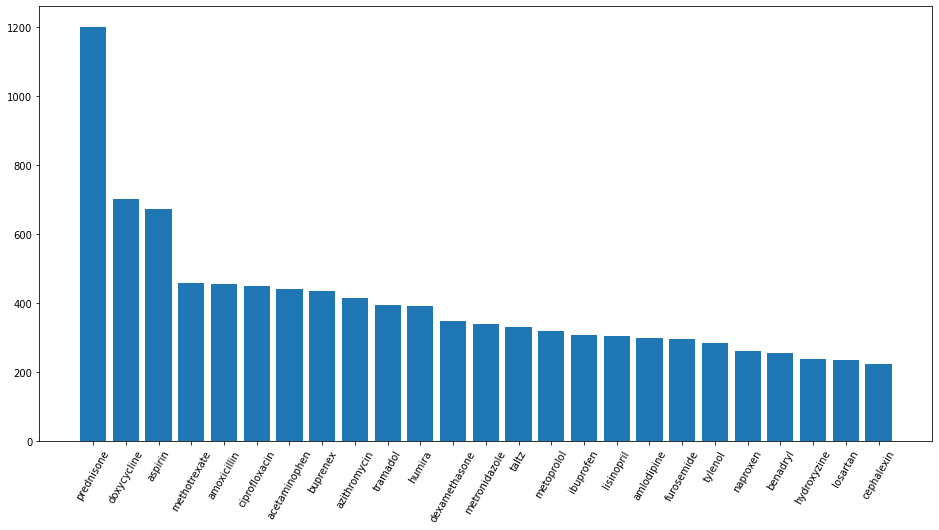

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(16,8))

# Only plot the nodes with highest degree - plotting all takes long
plot_top_x = 25

plt.bar(degree_df.iloc[:plot_top_x,0],degree_df.iloc[:plot_top_x,1])
# _ = so as not to show many lines of matplotlib function calls
_ = plt.xticks(degree_df.iloc[:plot_top_x,0], rotation=60)

# This graph very much follows a power-law distribution

Text(0.5, 1.0, 'Nr. of drugs related/connected to each drug')

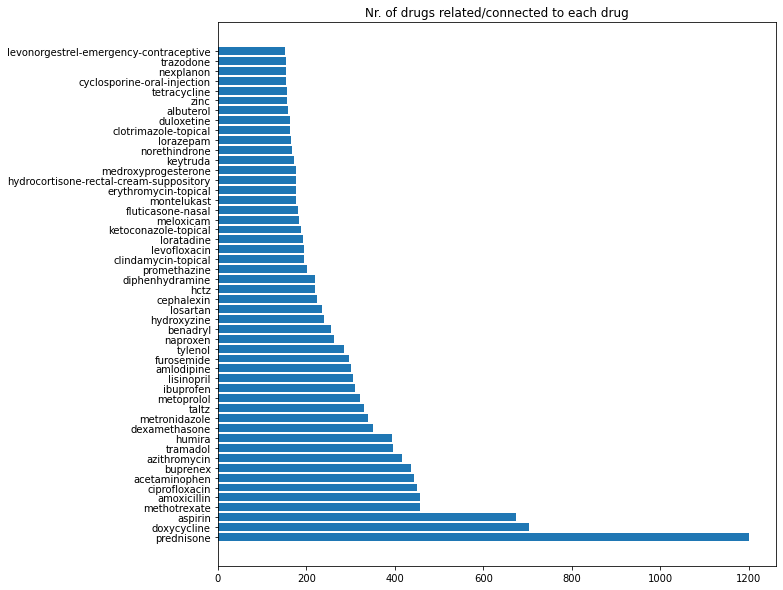

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(10,10))

# Only plot the nodes with highest degree - plotting all takes long
plot_top_x = 50

plt.barh(degree_df.iloc[:plot_top_x,0],degree_df.iloc[:plot_top_x,1])
plt.title("Nr. of drugs related/connected to each drug")

# Embed Graph using various Methods

## [Node2Vec](https://snap.stanford.edu/node2vec)

<font color="red">Using node2vec from pip install Fails with: ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject</font>

https://github.com/MaartenGr/BERTopic/issues/392 here it says it may be due to Python version being too new

`!pip install node2vec`

### Downloading the original Node2vec code, written in C

In [ ]:
%cd /content
!git clone https://github.com/snap-stanford/snap.git

/content
Cloning into 'snap'...
remote: Enumerating objects: 13397, done.
remote: Total 13397 (delta 0), reused 0 (delta 0), pack-reused 13397
Receiving objects: 100% (13397/13397), 159.04 MiB | 21.86 MiB/s, done.
Resolving deltas: 100% (9453/9453), done.


In [ ]:
%cd snap/examples/node2vec

/content/snap/examples/node2vec


In [ ]:
!ls

emb    Makefile     node2vec	  ReadMe.txt  stdafx.h
graph  Makefile.ex  node2vec.cpp  stdafx.cpp  targetver.h


In [ ]:
!make -j --silent

In [ ]:
!head -5 /content/drive/MyDrive/drugs-com/drugs_integer_graph.csv

345 355
345 4581
345 5354
345 4705
345 1007


In [ ]:
!./node2vec -i:/content/drive/MyDrive/drugs-com/drugs_integer_graph.csv -o:drugs.embedding -v


An algorithmic framework for representational learning on graphs. [Jan 21 2023]
Input graph path (-i:)=/content/drive/MyDrive/drugs-com/drugs_integer_graph.csv
Output graph path (-o:)=drugs.embedding
Number of dimensions. Default is 128 (-d:)=128
Length of walk per source. Default is 80 (-l:)=80
Number of walks per source. Default is 10 (-r:)=10
Context size for optimization. Default is 10 (-k:)=10
Number of epochs in SGD. Default is 1 (-e:)=1
Return hyperparameter. Default is 1 (-p:)=1
Inout hyperparameter. Default is 1 (-q:)=1
Verbose output. (-v)=YES
Graph is directed. (-dr)=NO
Graph is weighted. (-w)=NO
Output random walks instead of embeddings. (-ow)=NO
Read 44653 lines from /content/drive/MyDrive/drugs-com/drugs_integer_graph.csv
Preprocessing progress: 99.73% 
Walking Progress: 97.30%
Learning Progress: 99.88% 


In [ ]:
!head -5 drugs.embedding

8222 128
5570 -0.323723 -0.291567 0.0586541 0.0778531 0.413612 0.0544943 0.0118981 0.617043 -0.210808 0.484507 0.170045 0.266493 -0.0604354 -0.353063 0.275152 -0.199661 -0.22857 -0.0230292 0.0188353 0.251823 0.2035 0.689113 0.266217 -0.300786 0.446657 0.298385 0.323647 -0.185882 -0.0643296 0.432575 -0.460388 -0.0971916 0.173347 -0.457422 0.607835 0.0193539 0.0607983 0.37705 0.0569637 0.0937369 0.460947 0.391526 -0.00662839 -0.458519 0.033279 0.0886383 -0.00135856 0.0383459 -0.338291 -0.529259 -0.017061 0.267887 0.224079 -0.47325 0.116913 -0.183567 -0.362462 -0.204035 0.539324 -0.651421 -0.540463 -0.303226 0.183943 -0.275605 0.0778889 0.265714 -0.0334896 -0.265144 0.350822 -0.00552446 0.21143 0.173396 -0.36735 0.165845 -0.120108 0.605006 0.169461 0.00254372 -0.0499647 -0.0541232 -0.298821 -0.0210055 0.284924 -0.0374573 -0.21583 0.113561 0.279939 0.0753857 0.10339 -0.0380101 0.0242463 0.0703762 -0.144476 -0.396908 -0.271697 0.344937 0.0069135 -0.168388 -0.0891774 0.258757 -0.160349 0.499

In [ ]:
!mv drugs.embedding /content/drive/MyDrive/drugs-com

It seems like the first line is (nr. nodes, nr.embedding dimensions)

The rest of the lines are: (node_number, [embedding_vector])

## save Node2Vec embedding with Drug Names

In [ ]:
import numpy as np
node2vec_embedding = np.loadtxt("/content/drive/MyDrive/drugs-com/drugs.embedding", skiprows=1)
node2vec_embedding

array([[ 5.57000e+03, -3.23723e-01, -2.91567e-01, ...,  1.69449e-01,
         2.07744e-01, -2.54284e-01],
       [ 6.05100e+03, -1.23141e-01, -3.23253e-01, ...,  1.61333e-01,
         2.36765e-01, -3.27113e-01],
       [ 1.74700e+03, -2.92564e-01, -3.21662e-01, ...,  1.65524e-01,
         2.13294e-01, -2.98408e-01],
       ...,
       [ 7.77900e+03,  1.47179e-03, -5.10435e-02, ...,  2.46664e-01,
         2.69321e-01,  6.89087e-03],
       [ 3.30600e+03,  7.27848e-02, -3.45818e-02, ..., -7.91683e-02,
         3.15224e-01, -2.43960e-02],
       [ 4.02100e+03,  9.44244e-02, -7.63561e-02, ..., -9.15227e-02,
         3.19478e-01, -6.49059e-02]])

In [ ]:
import pandas as pd

node2vec_emb_df = pd.DataFrame(node2vec_embedding)

node2vec_emb_df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,5570.0,-0.323723,-0.291567,0.058654,0.077853,0.413612,0.054494,0.011898,0.617043,-0.210808,...,0.132477,0.088689,0.184532,0.333733,0.419953,0.058960,-0.624818,0.169449,0.207744,-0.254284
1,6051.0,-0.123141,-0.323253,0.194745,0.154561,0.528102,0.046701,-0.046598,0.391827,0.039416,...,-0.077181,-0.013794,0.297128,0.602834,0.404838,0.010832,-0.615211,0.161333,0.236765,-0.327113
2,1747.0,-0.292564,-0.321662,0.058700,0.074401,0.493845,0.102989,-0.001108,0.399875,-0.173602,...,0.091123,0.065270,0.182216,0.442655,0.359204,0.050730,-0.668857,0.165524,0.213294,-0.298408
3,6750.0,-0.384151,-0.418500,-0.000031,0.045359,0.619183,0.122457,0.137907,0.481758,-0.254490,...,0.024268,0.051780,0.151665,0.412369,0.300024,0.041483,-0.604143,0.082892,0.191426,-0.271832
4,95.0,-0.402769,-0.431971,0.115276,0.008249,0.720240,0.083744,0.039106,0.373473,-0.234607,...,0.085973,0.011555,0.072569,0.416404,0.361860,0.161704,-0.551718,-0.015370,0.069613,-0.152597


In [ ]:
# Change first column that contains node IDs to integer
node2vec_emb_df.iloc[:,0] = node2vec_emb_df.iloc[:,0].astype(np.int32)
node2vec_emb_df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,5570,-0.323723,-0.291567,0.058654,0.077853,0.413612,0.054494,0.011898,0.617043,-0.210808,...,0.132477,0.088689,0.184532,0.333733,0.419953,0.058960,-0.624818,0.169449,0.207744,-0.254284
1,6051,-0.123141,-0.323253,0.194745,0.154561,0.528102,0.046701,-0.046598,0.391827,0.039416,...,-0.077181,-0.013794,0.297128,0.602834,0.404838,0.010832,-0.615211,0.161333,0.236765,-0.327113
2,1747,-0.292564,-0.321662,0.058700,0.074401,0.493845,0.102989,-0.001108,0.399875,-0.173602,...,0.091123,0.065270,0.182216,0.442655,0.359204,0.050730,-0.668857,0.165524,0.213294,-0.298408
3,6750,-0.384151,-0.418500,-0.000031,0.045359,0.619183,0.122457,0.137907,0.481758,-0.254490,...,0.024268,0.051780,0.151665,0.412369,0.300024,0.041483,-0.604143,0.082892,0.191426,-0.271832
4,95,-0.402769,-0.431971,0.115276,0.008249,0.720240,0.083744,0.039106,0.373473,-0.234607,...,0.085973,0.011555,0.072569,0.416404,0.361860,0.161704,-0.551718,-0.015370,0.069613,-0.152597


In [ ]:
# Change name of first column with Drug IDs
node2vec_emb_df = node2vec_emb_df.rename(columns={0:"drug_id"})
node2vec_emb_df.head()

,drug_id,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,5570,-0.323723,-0.291567,0.058654,0.077853,0.413612,0.054494,0.011898,0.617043,-0.210808,...,0.132477,0.088689,0.184532,0.333733,0.419953,0.058960,-0.624818,0.169449,0.207744,-0.254284
1,6051,-0.123141,-0.323253,0.194745,0.154561,0.528102,0.046701,-0.046598,0.391827,0.039416,...,-0.077181,-0.013794,0.297128,0.602834,0.404838,0.010832,-0.615211,0.161333,0.236765,-0.327113
2,1747,-0.292564,-0.321662,0.058700,0.074401,0.493845,0.102989,-0.001108,0.399875,-0.173602,...,0.091123,0.065270,0.182216,0.442655,0.359204,0.050730,-0.668857,0.165524,0.213294,-0.298408
3,6750,-0.384151,-0.418500,-0.000031,0.045359,0.619183,0.122457,0.137907,0.481758,-0.254490,...,0.024268,0.051780,0.151665,0.412369,0.300024,0.041483,-0.604143,0.082892,0.191426,-0.271832
4,95,-0.402769,-0.431971,0.115276,0.008249,0.720240,0.083744,0.039106,0.373473,-0.234607,...,0.085973,0.011555,0.072569,0.416404,0.361860,0.161704,-0.551718,-0.015370,0.069613,-0.152597


### Convert Node IDs to drug names

In [ ]:
%cd /content

/content


In [ ]:
# Import the dictionary that maps drug URLs to Node IDs
import pickle

html_to_int_hashmap = {}
with open("/content/drive/MyDrive/drugs-com/url-int-mapping.pickle", "rb") as pickle_file:
    html_to_int_hashmap = pickle.load(pickle_file)

# html_to_int_hashmap

In [ ]:
# Need to inverse this dictionary: need to convert int > String

# https://stackoverflow.com/questions/483666/reverse-invert-a-dictionary-mapping
inv_map = {v: k for k, v in html_to_int_hashmap.items()}
# inv_map
inv_map[996]

'https:$$www.drugs.com$mtm$diuril-oral-injection.html'

In [ ]:
len(inv_map)

8222

In [ ]:
# Replace node id with drug name

# Look up Drug URLs
emb_drug_urls = []
for row_nr in range(len(node2vec_emb_df)):
    emb_drug_urls.append(inv_map[int(node2vec_emb_df.iloc[row_nr]["drug_id"])])

In [ ]:
# Make above easy to read - replace URL with just drug name

# function is defined towards the start of this notebook
emb_drug_names = [replace_url_w_drug_name(e) for e in emb_drug_urls]
emb_drug_names

In [ ]:
# Assign above list to dataframe
node2vec_emb_df["drug_id"] = emb_drug_names
node2vec_emb_df.head()

,drug_id,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,von-willebrand-factor-recombinant,-0.323723,-0.291567,0.058654,0.077853,0.413612,0.054494,0.011898,0.617043,-0.210808,...,0.132477,0.088689,0.184532,0.333733,0.419953,0.058960,-0.624818,0.169449,0.207744,-0.254284
1,tissueblue,-0.123141,-0.323253,0.194745,0.154561,0.528102,0.046701,-0.046598,0.391827,0.039416,...,-0.077181,-0.013794,0.297128,0.602834,0.404838,0.010832,-0.615211,0.161333,0.236765,-0.327113
2,double-antibiotic,-0.292564,-0.321662,0.058700,0.074401,0.493845,0.102989,-0.001108,0.399875,-0.173602,...,0.091123,0.065270,0.182216,0.442655,0.359204,0.050730,-0.668857,0.165524,0.213294,-0.298408
3,aristospan,-0.384151,-0.418500,-0.000031,0.045359,0.619183,0.122457,0.137907,0.481758,-0.254490,...,0.024268,0.051780,0.151665,0.412369,0.300024,0.041483,-0.604143,0.082892,0.191426,-0.271832
4,dexedrine-tablets,-0.402769,-0.431971,0.115276,0.008249,0.720240,0.083744,0.039106,0.373473,-0.234607,...,0.085973,0.011555,0.072569,0.416404,0.361860,0.161704,-0.551718,-0.015370,0.069613,-0.152597


In [ ]:
node2vec_emb_df = node2vec_emb_df.set_index("drug_id")
node2vec_emb_df.head()

,1,2,3,4,5,6,7,8,9,10,...,119,120,121,122,123,124,125,126,127,128
drug_id,,,,,,,,,,,,,,,,,,,,,
von-willebrand-factor-recombinant,-0.323723,-0.291567,0.058654,0.077853,0.413612,0.054494,0.011898,0.617043,-0.210808,0.484507,...,0.132477,0.088689,0.184532,0.333733,0.419953,0.058960,-0.624818,0.169449,0.207744,-0.254284
tissueblue,-0.123141,-0.323253,0.194745,0.154561,0.528102,0.046701,-0.046598,0.391827,0.039416,0.430596,...,-0.077181,-0.013794,0.297128,0.602834,0.404838,0.010832,-0.615211,0.161333,0.236765,-0.327113
double-antibiotic,-0.292564,-0.321662,0.058700,0.074401,0.493845,0.102989,-0.001108,0.399875,-0.173602,0.457549,...,0.091123,0.065270,0.182216,0.442655,0.359204,0.050730,-0.668857,0.165524,0.213294,-0.298408
aristospan,-0.384151,-0.418500,-0.000031,0.045359,0.619183,0.122457,0.137907,0.481758,-0.254490,0.532832,...,0.024268,0.051780,0.151665,0.412369,0.300024,0.041483,-0.604143,0.082892,0.191426,-0.271832
dexedrine-tablets,-0.402769,-0.431971,0.115276,0.008249,0.720240,0.083744,0.039106,0.373473,-0.234607,0.460392,...,0.085973,0.011555,0.072569,0.416404,0.361860,0.161704,-0.551718,-0.015370,0.069613,-0.152597


In [ ]:
!pwd

/content


In [ ]:
node2vec_emb_df.to_csv("/content/drive/MyDrive/drugs-com/drug-name-embedding-df.csv")

## Load & reuse saved Node2Vec Drug embedding from file

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
node2vec_emb_df = pd.read_csv("/content/drive/MyDrive/drugs-com/drug-name-embedding-df.csv", index_col=0)
node2vec_emb_df.head(25)

,1,2,3,4,5,6,7,8,9,10,...,119,120,121,122,123,124,125,126,127,128
drug_id,,,,,,,,,,,,,,,,,,,,,
von-willebrand-factor-recombinant,-0.323723,-0.291567,0.058654,0.077853,0.413612,0.054494,0.011898,0.617043,-0.210808,0.484507,...,0.132477,0.088689,0.184532,0.333733,0.419953,0.058960,-0.624818,0.169449,0.207744,-0.254284
tissueblue,-0.123141,-0.323253,0.194745,0.154561,0.528102,0.046701,-0.046598,0.391827,0.039416,0.430596,...,-0.077181,-0.013794,0.297128,0.602834,0.404838,0.010832,-0.615211,0.161333,0.236765,-0.327113
double-antibiotic,-0.292564,-0.321662,0.058700,0.074401,0.493845,0.102989,-0.001108,0.399875,-0.173602,0.457549,...,0.091123,0.065270,0.182216,0.442655,0.359204,0.050730,-0.668857,0.165524,0.213294,-0.298408
aristospan,-0.384151,-0.418500,-0.000031,0.045359,0.619183,0.122457,0.137907,0.481758,-0.254490,0.532832,...,0.024268,0.051780,0.151665,0.412369,0.300024,0.041483,-0.604143,0.082892,0.191426,-0.271832
dexedrine-tablets,-0.402769,-0.431971,0.115276,0.008249,0.720240,0.083744,0.039106,0.373473,-0.234607,0.460392,...,0.085973,0.011555,0.072569,0.416404,0.361860,0.161704,-0.551718,-0.015370,0.069613,-0.152597
ranolazine,-0.180386,-0.560555,0.182458,0.054106,0.732317,0.084876,0.112465,0.185915,-0.321978,0.371752,...,-0.025820,0.038788,0.147494,0.356204,0.521728,0.010933,-0.533179,-0.047000,-0.196515,-0.065956
histrelin-implant,-0.021583,-0.508771,0.128076,-0.045686,0.265343,0.236857,-0.005184,0.198909,-0.027885,0.322957,...,-0.355980,-0.462486,0.068376,0.483245,0.328607,-0.081924,-0.503899,0.331442,-0.356814,-0.339980
verelan-pm,0.117189,-0.434526,0.167458,-0.051145,0.401631,0.057131,0.085937,0.040942,-0.241533,0.382572,...,-0.507931,-0.386580,0.227849,0.345377,0.346079,-0.078256,-0.530451,0.247765,-0.290349,-0.129833
magnesium-salicylate,0.095989,-0.452235,0.144739,-0.036459,0.345434,0.063256,0.268449,0.227056,0.055613,0.413449,...,-0.267451,-0.494075,0.172550,0.516367,0.407727,-0.030861,-0.495595,0.202414,-0.226832,-0.160429


## <font color="red">Do with Les Mis to understand how stuff works</font>

Plot Node2Vec results on graph - reproduce Fig. 3 on node2vec paper

In [ ]:
node2vec_emb_df.loc['tissueblue']

1     -0.123141
2     -0.323253
3      0.194745
4      0.154561
5      0.528102
         ...   
124    0.010832
125   -0.615211
126    0.161333
127    0.236765
128   -0.327113
Name: tissueblue, Length: 128, dtype: float64

### <font color="purple"> Compute Dot-product similarities between drugs</font>

In [ ]:
# Return the dot-product similarity of the argument drug to all other drugs
def dot_similar_drugs(drug_id: str):
    target_drug = np.array(node2vec_emb_df.loc[drug_id])
    target_drug = target_drug.reshape(len(target_drug),1)

    # (nr_drugs, embed_dimens) x (embed_dimens, 1) = (similarities, 1)
    dot_prod = np.array(node2vec_emb_df) @ target_drug

    res_df = pd.DataFrame(dot_prod, index=node2vec_emb_df.index)

    # Assign drug IDs to the above
    return res_df.sort_values(0, ascending=False)

In [ ]:
a = dot_similar_drugs("ibuprofen")
a

,0
drug_id,
ibuprofen,11.942550
aubra,11.560977
low-ogestrel,11.528036
iopamidol,11.214969
smallpox-and-monkeypox-vaccine,11.202972
...,...
factor-xiii-intravenous,2.046148
zilxi,2.001905
capsaicin-lidocaine-menthol-and-methyl-salicylate-topical,1.991175


In [ ]:
# idxmax == argmax
dot_similar_drugs("tissueblue").idxmax()

0    tissueblue
dtype: object

#### So the top dot-product result is the original drug itself - makes sense

### Try cosine similarity

In [ ]:
# Cosine
# from sklearn.metrics.pairwise import cosine_similarity # This has weird

# This is cosine distance, i.e. opposite of similarity
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html
from scipy.spatial.distance import cosine as cosine_distance

# Return the dot-product similarity of the argument drug to all other drugs
def cosine_similar_drugs(drug_id: str):
    target_drug = np.array(node2vec_emb_df.loc[drug_id])
    target_drug = target_drug.reshape(len(target_drug),1)

    # (nr_drugs, embed_dimens) x (embed_dimens, 1) = (similarities, 1) / norm(A) * norm(B)
    cosine_distances = np.array([cosine_distance(target_drug, node2vec_emb_df.iloc[i,:]) for i in range(len(node2vec_emb_df))])

    cosine_similarities = 1-cosine_distances

    res_df = pd.DataFrame(cosine_similarities, index=node2vec_emb_df.index)

    # Assign drug IDs to the above
    return res_df.sort_values(0, ascending=False)

In [ ]:
res = cosine_similar_drugs("ibuprofen")

In [ ]:
res.head(20) # 20 Most similar drugs to Ibuprofen

,0
drug_id,
ibuprofen,1.000000
low-ogestrel,0.983187
reltone,0.976907
aubra,0.947808
mounjaro-injection,0.944367
exelon,0.940345
ambifed-cd,0.936148
nuvakaan-ii,0.931079
cetacort,0.930498


In [ ]:
res.tail(20) # 20 Least similar drugs to Ibuprofen

,0
drug_id,
anagrelide,0.182296
beclomethasone-inhalation,0.179030
pimtrea,0.178690
stimufend,0.177798
cambia,0.175424
tafluprost,0.172914
factor-xiii-intravenous,0.172870
mononine,0.171680
esclim-transdermal,0.171186


In [ ]:
node2vec_emb_df.loc["ibuprofen"]

1      0.298653
2     -0.019326
3      0.229782
4     -0.298834
5      0.446522
         ...   
124   -0.069555
125   -0.347667
126    0.398117
127   -0.161826
128   -0.293903
Name: ibuprofen, Length: 128, dtype: float64

## GEE embeddings

1. <font color="green">Ran GEE manually on local machine - TODO fix this</font>
2. Uploaded results
3. Loading them from file here

In [ ]:
!pwd

/content


In [ ]:
GEE_emb = np.load("/content/drive/MyDrive/drugs-com/GEE_drug_emb_unsup.npy")
GEE_emb

array([[0.00110152, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00018359, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00201946, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00018359, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00165229, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
np.sum(GEE_emb[0,:])

0.0011015237745548008

In [ ]:
np.sum(GEE_emb[:,1:])

17193.475461324433

In [ ]:
np.sum(GEE_emb[:,4])

8.166666666666675

In [ ]:
np.sum(node2vec_emb_df.iloc[0,:])

3.3621728099999997